<a href="https://colab.research.google.com/github/mukulbedi1/cat_vs_dog/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 290MB/s]
100% 1.06G/1.06G [00:05<00:00, 223MB/s]


In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipref.extractall('/content')
zipref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import cv2


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/train',
  labels = "inferred",
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels = "inferred",
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.4948 - accuracy: 0.5732 - val_loss: 0.6698 - val_accuracy: 0.5644
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6515 - accuracy: 0.6144 - val_loss: 0.6258 - val_accuracy: 0.6618
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6300 - accuracy: 0.6598 - val_loss: 0.6664 - val_accuracy: 0.5892
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5826 - accuracy: 0.7003 - val_loss: 0.7125 - val_accuracy: 0.6420
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5448 - accuracy: 0.7316 - val_loss: 0.5770 - val_accuracy: 0.6938
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5309 - accuracy: 0.7483 - val_loss: 0.7320 - val_accuracy: 0.6416
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4974 - accuracy: 0.7711 - val_loss: 0.5379 - val_ac

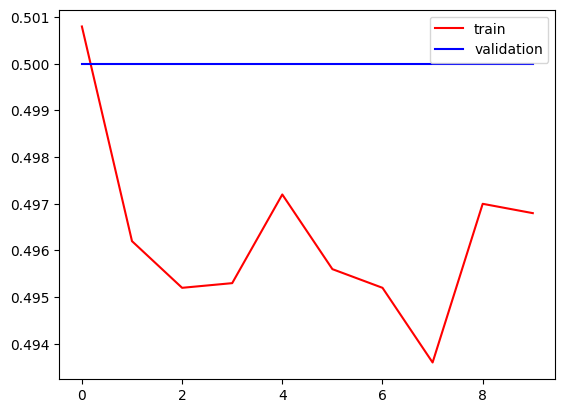

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

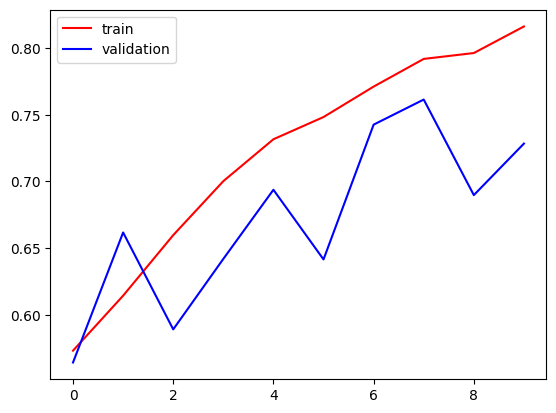

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

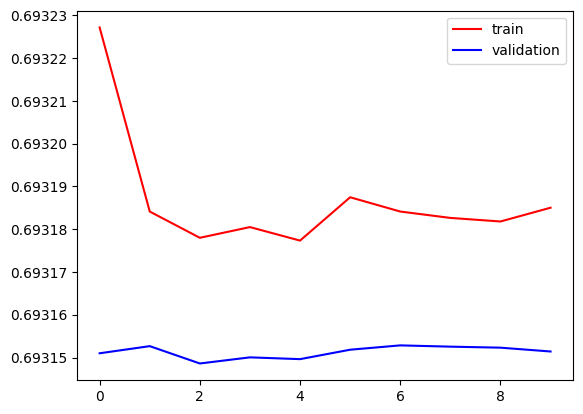

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

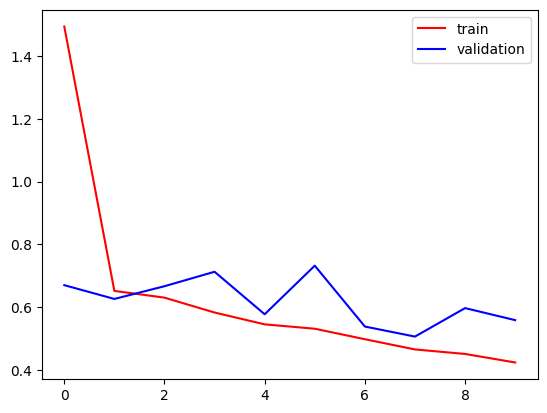

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

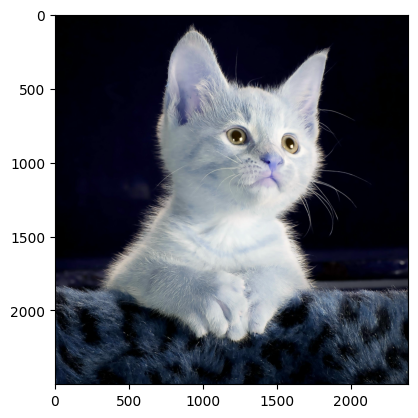

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.1471776]], dtype=float32)